In [4]:
#load in relevant libararies
import geopandas as gpd
import matplotlib.pyplot as plt

#load files
SA1 = gpd.read_file('Study_Area_1.shp')
SA2 = gpd.read_file('Study_Area_2.shp')
R = gpd.read_file('river.shp')



<Axes: >

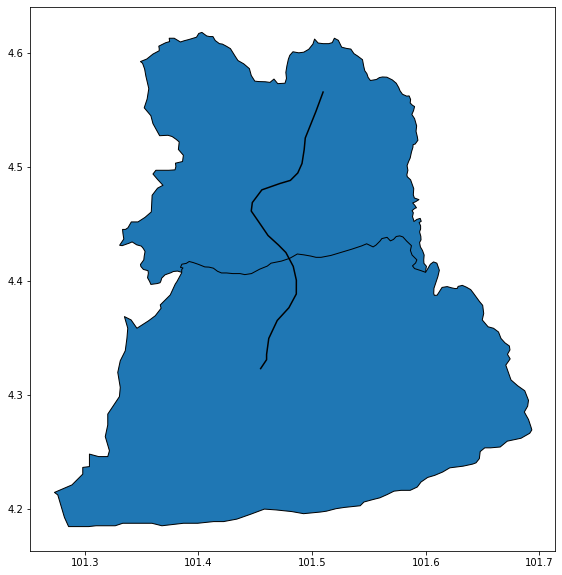

In [7]:
#intersection example

fig, ax = plt.subplots(figsize = (10,10)) 
SA1.plot(ax=ax, edgecolor = 'black')
SA2.plot(ax=ax,edgecolor = 'black')
R.plot(ax=ax, color = 'black')

<Axes: >

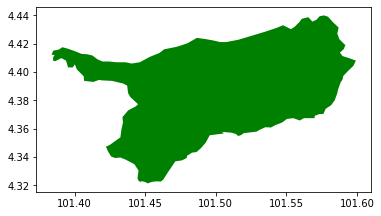

In [11]:
Inter = gpd.overlay(SA1,SA2, how = 'intersection')
Inter.plot(color = 'green')

<Axes: >

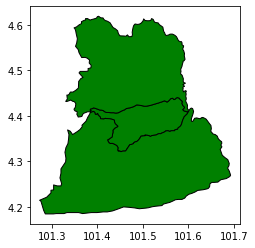

In [17]:
#union example
union = gpd.overlay(SA1,SA2, how = 'union')
union.plot(color = 'green',edgecolor = 'black')

<Axes: >

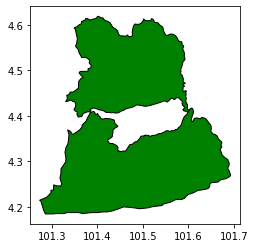

In [21]:
#symetric difference - area outside of union
sd = gpd.overlay(SA1,SA2, how = 'symmetric_difference')
sd.plot(color = 'green',edgecolor = 'black')

c:\Users\ktm0001\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


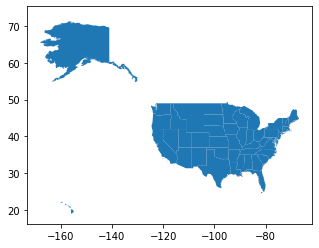

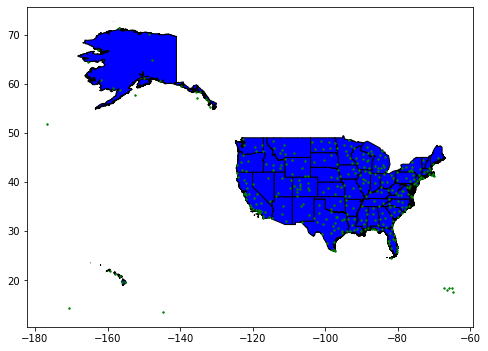

In [22]:
import pandas as pd
from shapely.geometry import Point
# Importing the states ESRI Shapefile of the USA 
us_states = gpd.read_file('us_states.shp')
us_states.plot()

airports_data = pd.read_csv('us_airports.csv')
geometry = [Point(xy) for xy in zip(airports_data['LONGITUDE'],airports_data['LATITUDE'])]
airports_us = gpd.GeoDataFrame(airports_data, geometry = geometry, crs = us_states.crs)

airports_us = airports_us[['AIRPORT', 'geometry']]

fig, ax = plt.subplots(figsize = (8,8))
us_states.plot(ax = ax, color = 'blue', edgecolor = 'black')
airports_us.plot(ax=ax, markersize = 2, color = 'green')

# Join attributes to 

airports_us = gpd.sjoin(airports_us, us_states, how  = 'inner', op = 'intersects')